<a href="https://colab.research.google.com/github/jaimemoramora/schoolprojects/blob/main/windforcecalculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Wind force plotter to obtain an idea of the forces the mast will face
#Jaime Mora, ME410, Section 101, Team 13
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
a_sec = 1.43 #area per section ft^2
number_of_sections = 4 # each section is 5' tall
heightsection = 5 #feet
a = a_sec*number_of_sections
totalheight = heightsection*number_of_sections
torque = 392.3 #n-m


In [ ]:
cd = 1.2 #cylinder
wind_vel = np.linspace(0, 200, 200) #velocity of the wind, mph


In [ ]:
p = 0.00256*(wind_vel)**2

force = a*p*cd
moment_on_base = force*number_of_sections*heightsection
wind_vel_metric = 0.44704*wind_vel #velocity of the wind, m/s
force_metric = force*4.44822 ##lbf to newtons


In [ ]:
moment_metric = (110/243)*force_metric*0.5*totalheight + (110/243)*force_metric*0.5*0.762


In [ ]:
bolt_cross_area = np.linspace(0.01,0.20,200)
shear = 1200 + (1/6)*((59/81)*torque*4.57 + 0.762*torque - (59/81)*torque*4.57)/bolt_cross_area #pascals


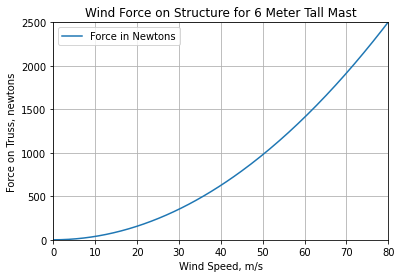

In [ ]:
tensilestress = force_metric*0.762
plot1 = plt.figure(1)
plt.plot(wind_vel_metric, force_metric,label='Force in Newtons')
plt.xlim(0,80)
plt.ylim(0,2500)
plt.title('Wind Force on Structure for 6 Meter Tall Mast')
plt.xlabel('Wind Speed, m/s')
plt.ylabel('Force on Truss, newtons')
plt.legend(loc='upper left')
plt.grid()



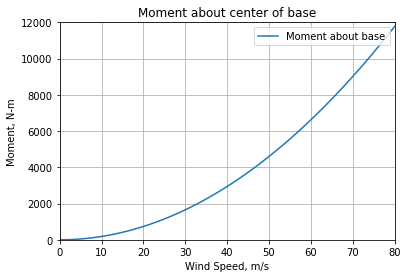

In [ ]:
plot2 = plt.figure(2)
plt.plot(wind_vel_metric, moment_metric,label='Moment about base')
plt.xlim(0,80)
plt.ylim(0,12000)
plt.title('Moment about center of base')
plt.xlabel('Wind Speed, m/s')
plt.ylabel('Moment, N-m')
plt.grid()
plt.legend(loc='upper right')


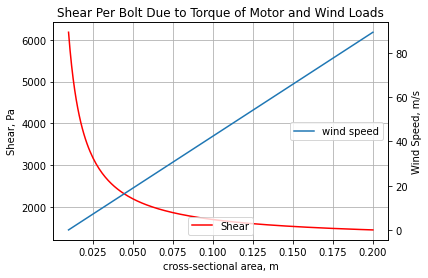

In [ ]:
plot3 = plt.figure(3)
plt.plot(bolt_cross_area, shear,'-r',label='Shear')
plt.legend(loc='lower center')
plt.title('Shear Per Bolt Due to Torque of Motor and Wind Loads')
plt.grid()
plt.xlabel('cross-sectional area, m')
plt.ylabel('Shear, Pa')
plt.twinx()
plt.plot(bolt_cross_area, wind_vel_metric,label='wind speed')
plt.ylabel('Wind Speed, m/s')
plt.legend(loc='center right')


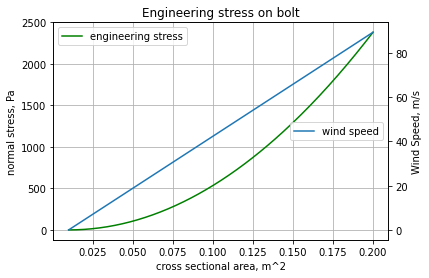

In [ ]:
plt4 = plt.figure(4)
plt.plot(bolt_cross_area,tensilestress,'-g',label='engineering stress')
plt.title('Engineering stress on bolt')
plt.legend()
plt.grid()
plt.xlabel('cross sectional area, m^2')
plt.ylabel('normal stress, Pa')
plt.twinx()
plt.plot(bolt_cross_area, wind_vel_metric,label='wind speed')
plt.ylabel('Wind Speed, m/s')
plt.legend(loc='right')
plt.show()
